In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

series = pd.read_csv(r'C:\Users\HP\VIThack\Challenge3\ASIANPAINTALLN.csv', header=0,index_col=0, squeeze=True)
series2 = pd.read_csv(r'C:\Users\HP\VIThack\ASIANPAINT.BO.csv', header=0,index_col=0, squeeze=True)
train = series.iloc[:,8:9].values#training on 3 years of asianpaints close stocks till 22/8/19
test=series2.iloc[:,4:5].values#predicting close stocks for asianpaints:23/8/19 to 22/9/19

In [81]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)

predicted=1576.353804, expected=1579.750000
predicted=1580.737230, expected=1597.900024
predicted=1601.177787, expected=1601.150024
predicted=1602.211098, expected=1603.699951
predicted=1604.350216, expected=1615.400024
predicted=1618.106676, expected=1615.199951
predicted=1616.313216, expected=1576.500000
predicted=1572.339403, expected=1534.900024
predicted=1529.923411, expected=1520.150024
predicted=1519.412496, expected=1532.650024
predicted=1535.325216, expected=1540.800049
predicted=1542.247509, expected=1561.300049
predicted=1564.401928, expected=1539.599976
predicted=1537.550745, expected=1547.949951
predicted=1548.817548, expected=1520.550049
predicted=1519.328033, expected=1531.050049
predicted=1531.550839, expected=1548.099976
predicted=1552.578455, expected=1554.349976
predicted=1555.114859, expected=1672.349976


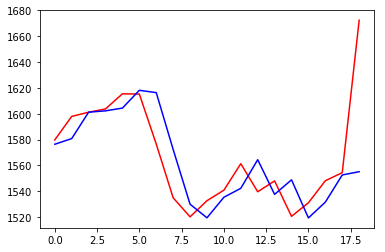

Test RMSE: 32.257


In [82]:
import math
error=math.sqrt(error)
# plot
plt.plot(test,  color='red')#real closed stock data in red
plt.plot(predictions, color='blue')#predicted closed stock data in blue
plt.show()
print('Test RMSE: %.3f' % error)

In [98]:
#Using LSTM-RNN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train=pd.read_csv(r"C:\Users\HP\VIThack\Challenge3\ASIANPAINTALLN.csv")#training on 3 years of asianpaints stocks till 22/8/19
train_set=dataset_train.iloc[:,8:9].values
#normalization
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_trainset=sc.fit_transform(train_set)

In [99]:
#data structure with 80 timesteps and 1 output
xtrain=[]
ytrain=[]
for i in range(80,len(scaled_trainset)):
    xtrain.append(scaled_trainset[i-80:i,0])
    ytrain.append(scaled_trainset[i,0])
xtrain,ytrain=np.array(xtrain),np.array(ytrain)
#reshaping
xtrain=np.reshape(xtrain,(xtrain.shape[0], xtrain.shape[1], 1)) 

In [100]:
#rnn lstm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

reg=Sequential()

reg.add(LSTM(units=256,return_sequences=True,input_shape=(xtrain.shape[1], 1)))
reg.add(Dropout(rate=0.3))
reg.add(LSTM(units=256,return_sequences=True))
reg.add(Dropout(rate=0.3))
reg.add(LSTM(units=256,return_sequences=True))
reg.add(Dropout(rate=0.2))
reg.add(LSTM(units=256))
reg.add(Dropout(rate=0.2))
reg.add(Dense(units=1))
reg.compile(optimizer='adam',loss='mean_squared_error')

In [101]:
reg.fit(xtrain,ytrain, epochs=50, batch_size=16)

Epoch 1/50
415/415 [==============================] - 25s 60ms/step - loss: 0.0376
Epoch 2/50
415/415 [==============================] - 16s 38ms/step - loss: 0.0109
Epoch 3/50
415/415 [==============================] - 17s 42ms/step - loss: 0.0072
Epoch 4/50
415/415 [==============================] - 19s 46ms/step - loss: 0.0080
Epoch 5/50
415/415 [==============================] - 19s 45ms/step - loss: 0.0074
Epoch 6/50
415/415 [==============================] - 18s 44ms/step - loss: 0.0069
Epoch 7/50
415/415 [==============================] - 19s 45ms/step - loss: 0.0069
Epoch 8/50
415/415 [==============================] - 17s 42ms/step - loss: 0.0070
Epoch 9/50
415/415 [==============================] - 17s 42ms/step - loss: 0.0052
Epoch 10/50
415/415 [==============================] - 18s 43ms/step - loss: 0.0059
Epoch 11/50
415/415 [==============================] - 17s 42ms/step - loss: 0.0063
Epoch 12/50
415/415 [==============================] - 18s 44ms/step - loss: 0.0045
E

In [102]:
#predictions and results
dataset_test=pd.read_csv(r"C:\Users\HP\VIThack\ASIANPAINT.BO.csv")#predicting close stocks for asianpaints:23/8/19 to 22/9/19
real_stocks=dataset_test.iloc[:,4:5].values
total_dataset = pd.concat((dataset_train['Close Price'], dataset_test['Close']), axis = 0)
inputs=total_dataset[len(total_dataset)-len(real_stocks)-80:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [103]:
xtest=[]
for i in range(80,99):
    xtest.append(inputs[i-80:i,0])
xtest=np.array(xtest)
#reshaping
xtest=np.reshape(xtest,(xtest.shape[0], xtest.shape[1], 1))

predict_stocks=reg.predict(xtest)
predict_stocks=sc.inverse_transform(predict_stocks)

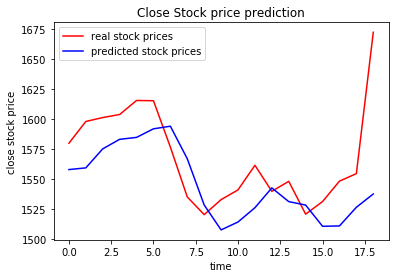

In [104]:
#visualization
plt.plot(real_stocks, color='red', label='real stock prices')
plt.plot(predict_stocks, color='blue', label='predicted stock prices')
plt.title('Close Stock price prediction')
plt.xlabel('time')
plt.ylabel('close stock price')
plt.legend()
plt.show()

In [107]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stocks, predict_stocks))
print("Test error:" ,rmse)

Test error: 39.5829232595085
